<a href="https://colab.research.google.com/github/matlarakshan/Almabetter_Projects/blob/main/Clustring_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [213]:
# Load Dataset
credit_card_data = pd.read_csv("/content/credit_card_data.csv")

In [214]:
# 1st five rows
credit_card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [215]:
# last five rows
credit_card_data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [216]:
# Dataset Rows & Columns count
credit_card_data.shape

(8950, 18)

In [217]:
# Dataset Info
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [218]:
# Dataset Duplicate Value Count
credit_card_data.duplicated().sum()

0

In [219]:
# Missing Values/Null Values Count
credit_card_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [220]:
credit_card_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [221]:
# Dataset Describe
credit_card_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [222]:
# Check Unique Values for each variable.
credit_card_data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [223]:
# Removing coulmns which have more unique values
credit_card_data = credit_card_data.drop('CUST_ID', axis = 1)
credit_card_data = credit_card_data.drop('BALANCE', axis = 1)
credit_card_data = credit_card_data.drop('PURCHASES', axis = 1)
credit_card_data = credit_card_data.drop('ONEOFF_PURCHASES', axis = 1)
credit_card_data = credit_card_data.drop('INSTALLMENTS_PURCHASES', axis = 1)
credit_card_data = credit_card_data.drop('CASH_ADVANCE', axis = 1)
credit_card_data = credit_card_data.drop('PAYMENTS', axis = 1)
credit_card_data = credit_card_data.drop('MINIMUM_PAYMENTS', axis = 1)

In [224]:
#To show the data types
credit_card_data.dtypes

BALANCE_FREQUENCY                   float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [225]:
credit_card_data.skew()

BALANCE_FREQUENCY                  -2.023266
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.535613
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.828686
CASH_ADVANCE_TRX                    5.721298
PURCHASES_TRX                       4.630655
CREDIT_LIMIT                        1.522464
PRC_FULL_PAYMENT                    1.942820
TENURE                             -2.943017
dtype: float64

In [226]:
credit_card_data.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8950.000000
mean,0.877271,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,0.153715,11.517318
std,0.236904,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,6.000000
25%,0.888889,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,0.000000,12.000000
50%,1.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,0.000000,12.000000
75%,1.000000,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,0.142857,12.000000
max,1.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,1.000000,12.000000


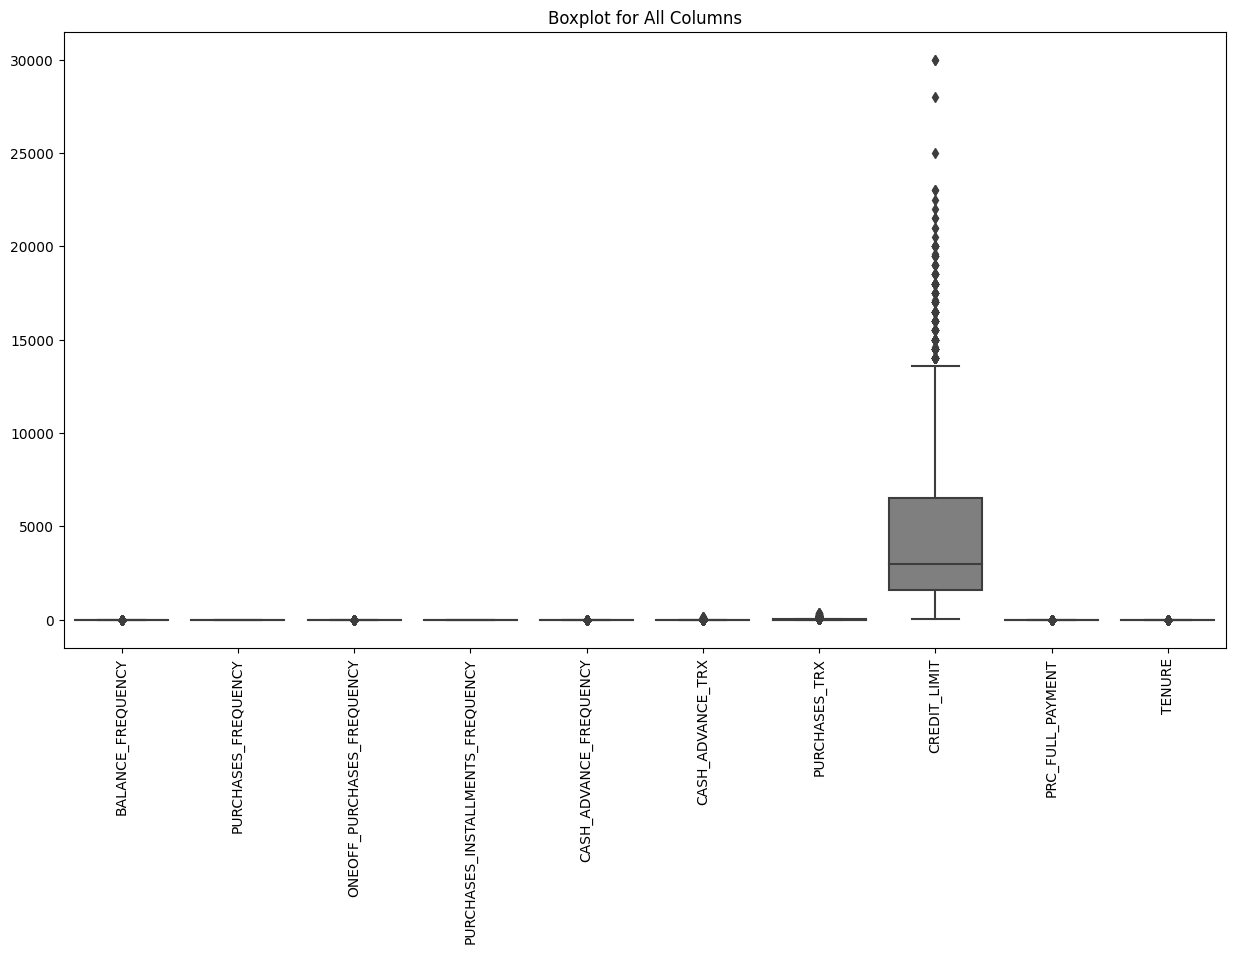

In [227]:
# Create a boxplot for all columns at once
plt.figure(figsize=(15, 8))
sns.boxplot(data=credit_card_data)
plt.title('Boxplot for All Columns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<Axes: >

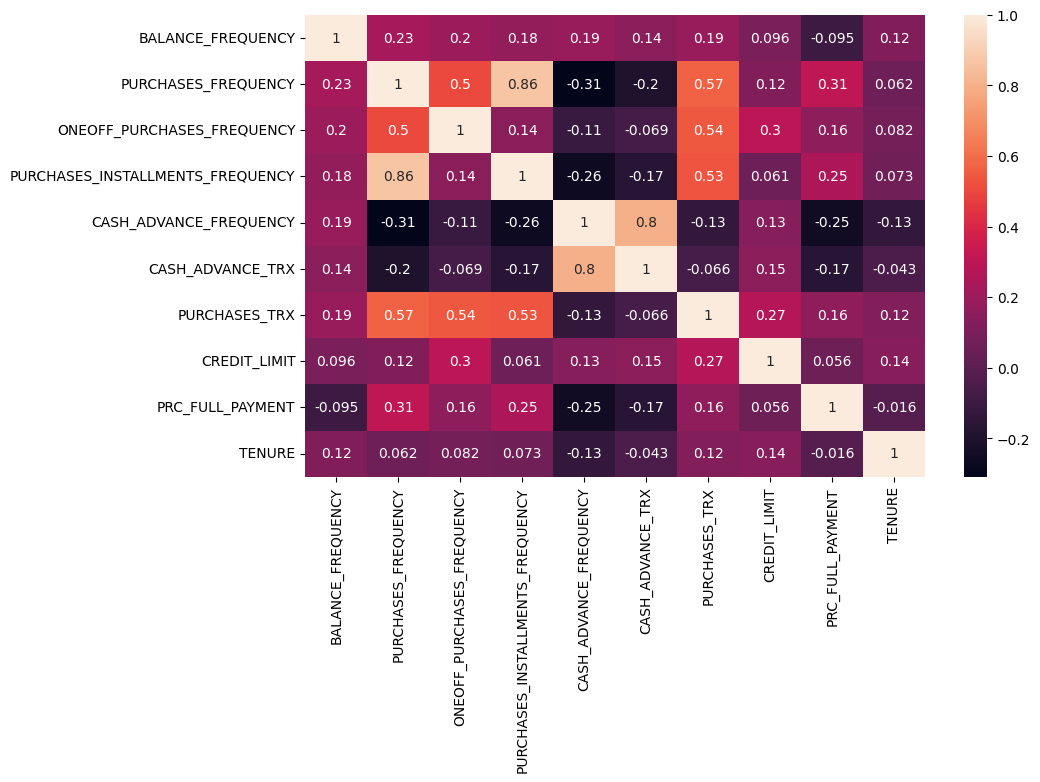

In [228]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(credit_card_data.corr(),annot=True)

In [229]:
# Purchase frequency and Purchase installments frequency has high co-relation. So we can drop one column in that.
# Cash advance frequency and Cash advance TRX has high co-relation. So we can drop one column in that.
credit_card_data = credit_card_data.drop('PURCHASES_INSTALLMENTS_FREQUENCY',axis=1)
credit_card_data = credit_card_data.drop('CASH_ADVANCE_TRX',axis=1)

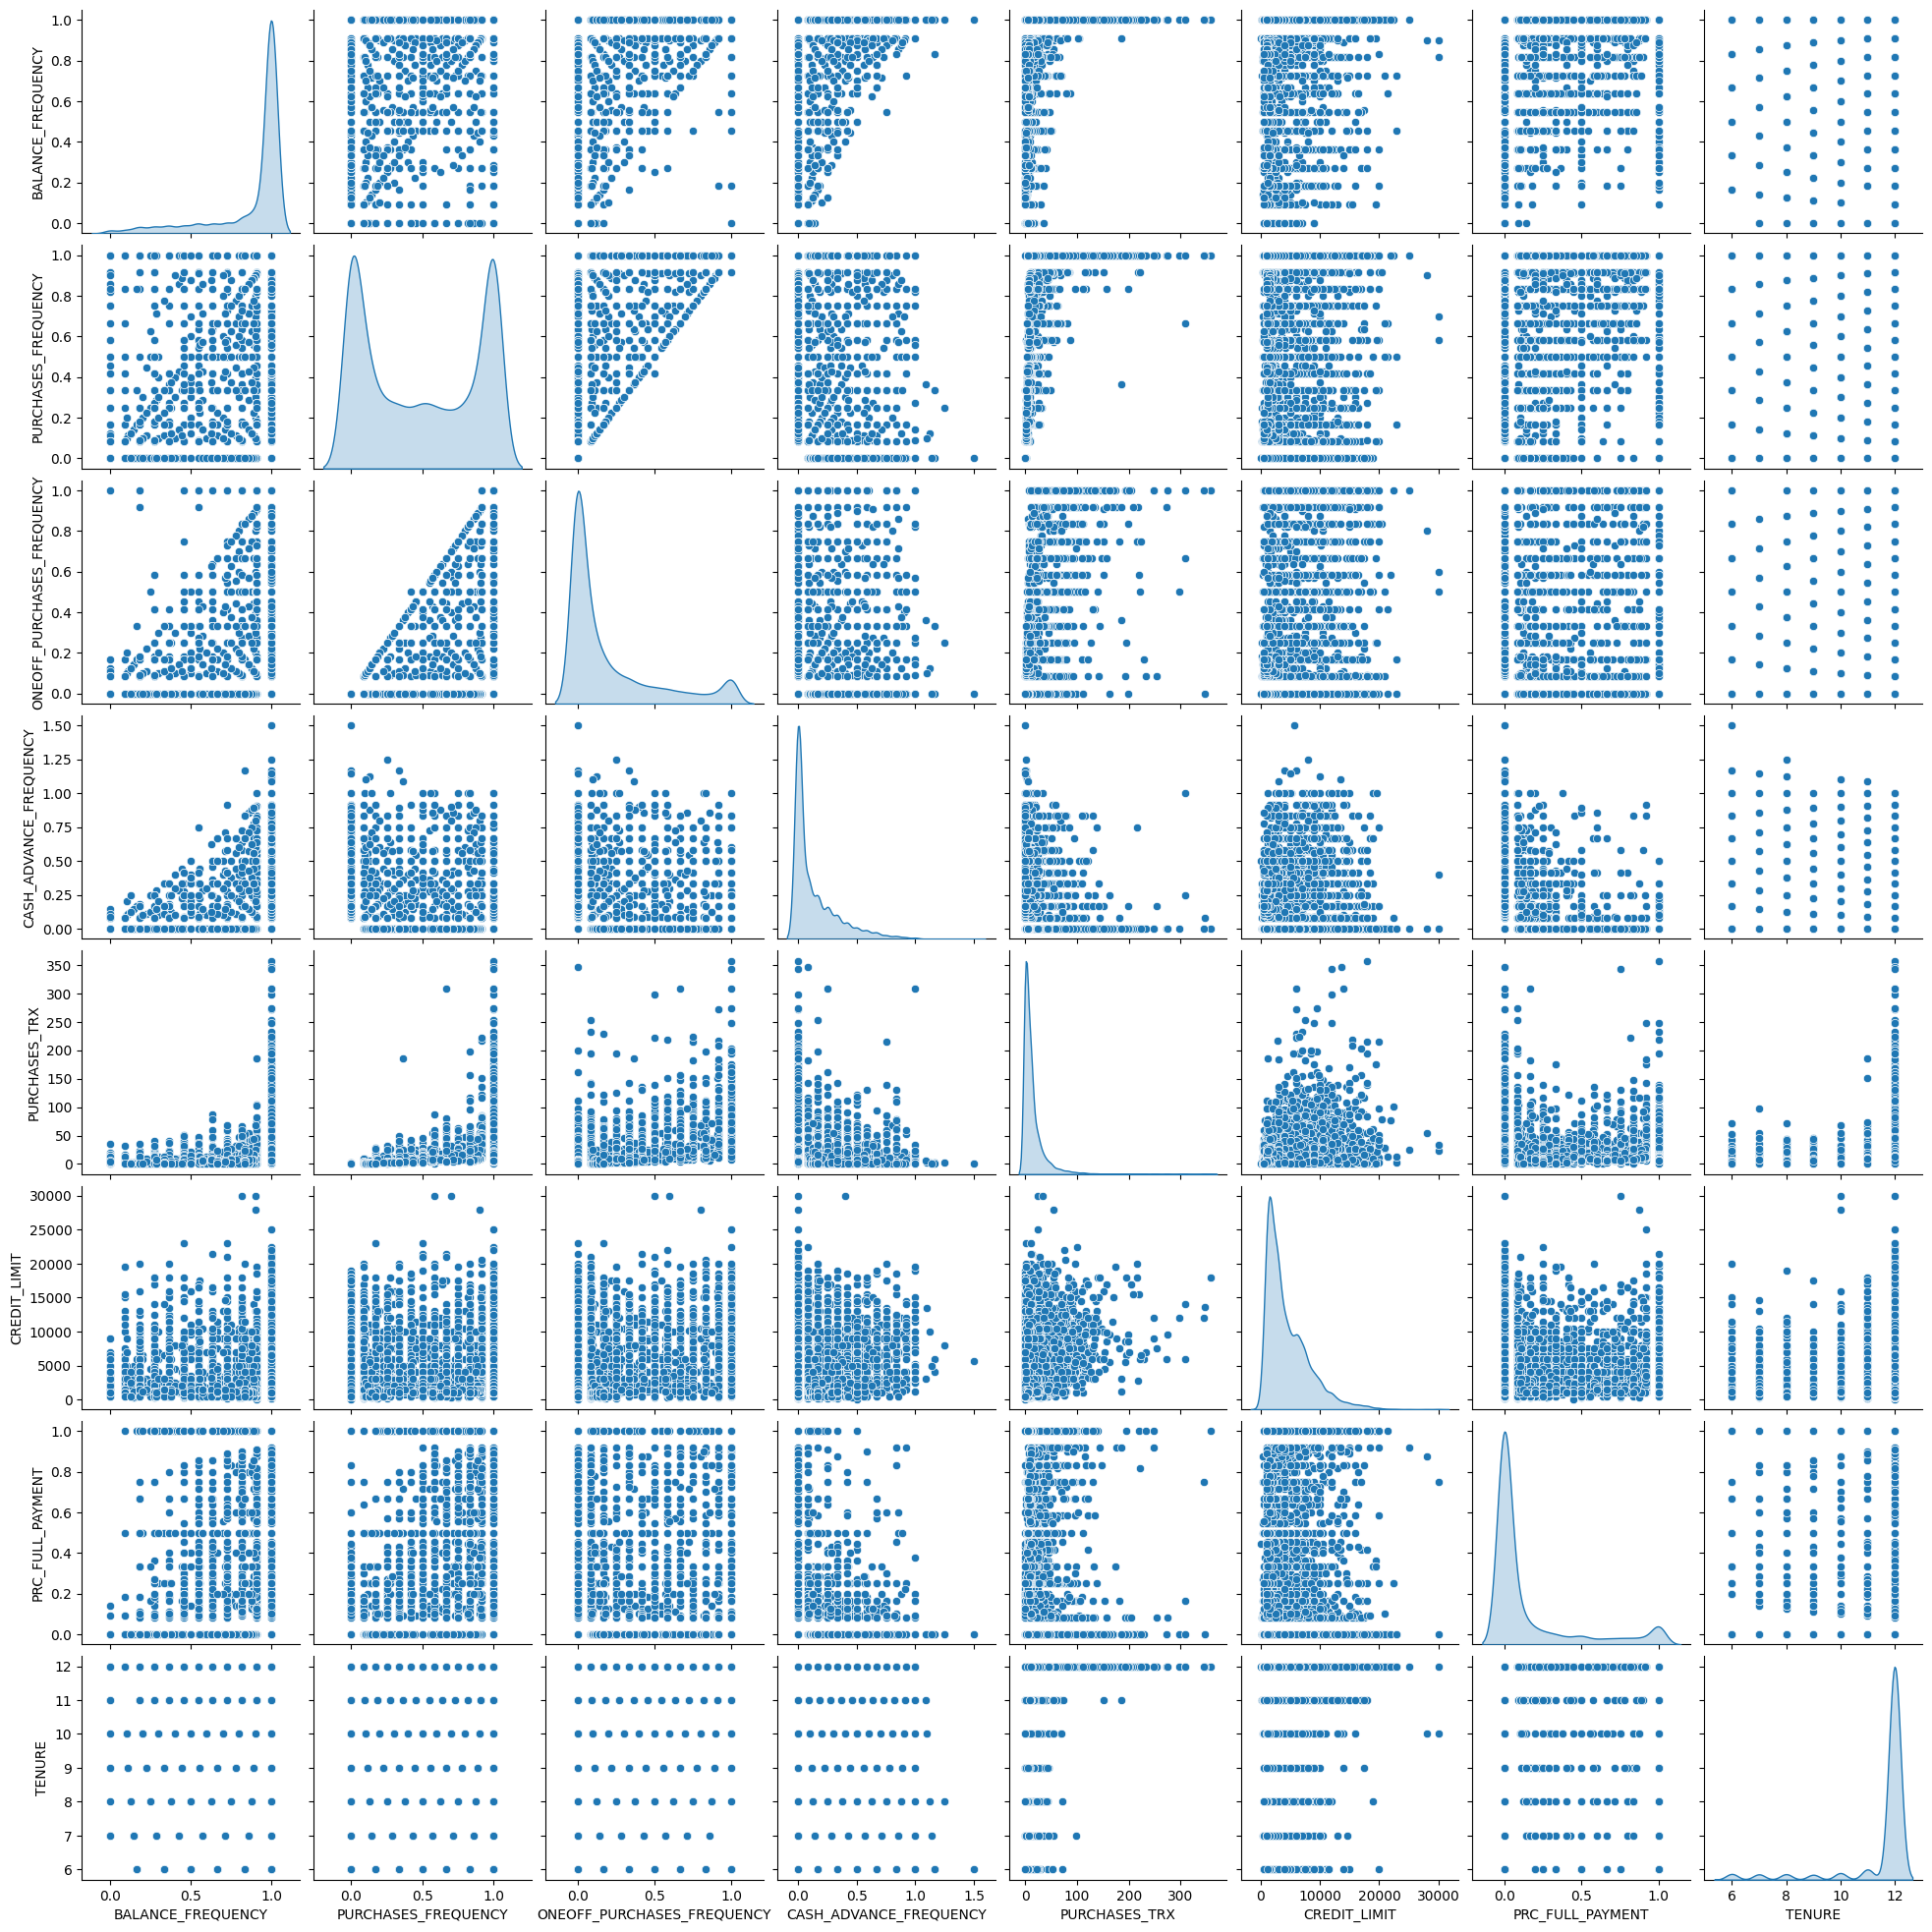

In [230]:
# Create a pair plot
sns.pairplot(credit_card_data, diag_kind='kde')

In [231]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [232]:
credit_card_data.skew()

BALANCE_FREQUENCY            -2.023266
PURCHASES_FREQUENCY           0.060164
ONEOFF_PURCHASES_FREQUENCY    1.535613
CASH_ADVANCE_FREQUENCY        1.828686
PURCHASES_TRX                 4.630655
CREDIT_LIMIT                  1.522464
PRC_FULL_PAYMENT              1.942820
TENURE                       -2.943017
dtype: float64

In [233]:
df = pd.DataFrame(pt.fit_transform(credit_card_data))
df.columns= credit_card_data.columns
df.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,-1.079348,-0.766859,-0.903315,-0.883204,-0.573664,-1.425281,-0.677889,0.422252
1,-0.424939,-1.278866,-0.903315,1.124423,-1.387624,0.924151,1.235021,0.422252
2,0.628612,1.218860,1.732554,-0.883204,0.494757,1.012124,-0.677889,0.422252
3,-1.710851,-1.015926,-0.092230,0.136071,-0.872718,1.012124,-0.677889,0.422252
4,0.628612,-1.015926,-0.092230,-0.883204,-0.872718,-1.215649,-0.677889,0.422252


In [234]:
df.skew()

BALANCE_FREQUENCY            -1.118938
PURCHASES_FREQUENCY          -0.044848
ONEOFF_PURCHASES_FREQUENCY    0.541358
CASH_ADVANCE_FREQUENCY        0.506434
PURCHASES_TRX                 0.006058
CREDIT_LIMIT                 -0.009659
PRC_FULL_PAYMENT              0.963939
TENURE                       -1.971472
dtype: float64

In [235]:
# OR ESLE WE CAN ALSO USE THE BELOW CODE FOR  ENCODING

### from sklearn.preprocessing import StandardScaler

# Handle non-numeric columns (e.g., encode categorical variables)
# Example: One-hot encoding for simplicity, use appropriate encoding for your data
### credit_card_data_encoded = pd.get_dummies(credit_card_data)

# Check data types
## print(credit_card_data.dtypes)

# Handle missing values if necessary (e.g., fill with mean, median, or drop them)
# Example: Filling missing values with mean
## credit_card_data_encoded.fillna(credit_card_data_encoded.mean(), inplace=True)

# Check for missing values
## print(credit_card_data_encoded.isnull().sum())

# Use StandardScaler for illustration
## scaler = StandardScaler()
## transformed_data = scaler.fit_transform(credit_card_data_encoded)

# Create a DataFrame from the transformed data
## df = pd.DataFrame(transformed_data, columns=credit_card_data_encoded.columns)
## df.head()

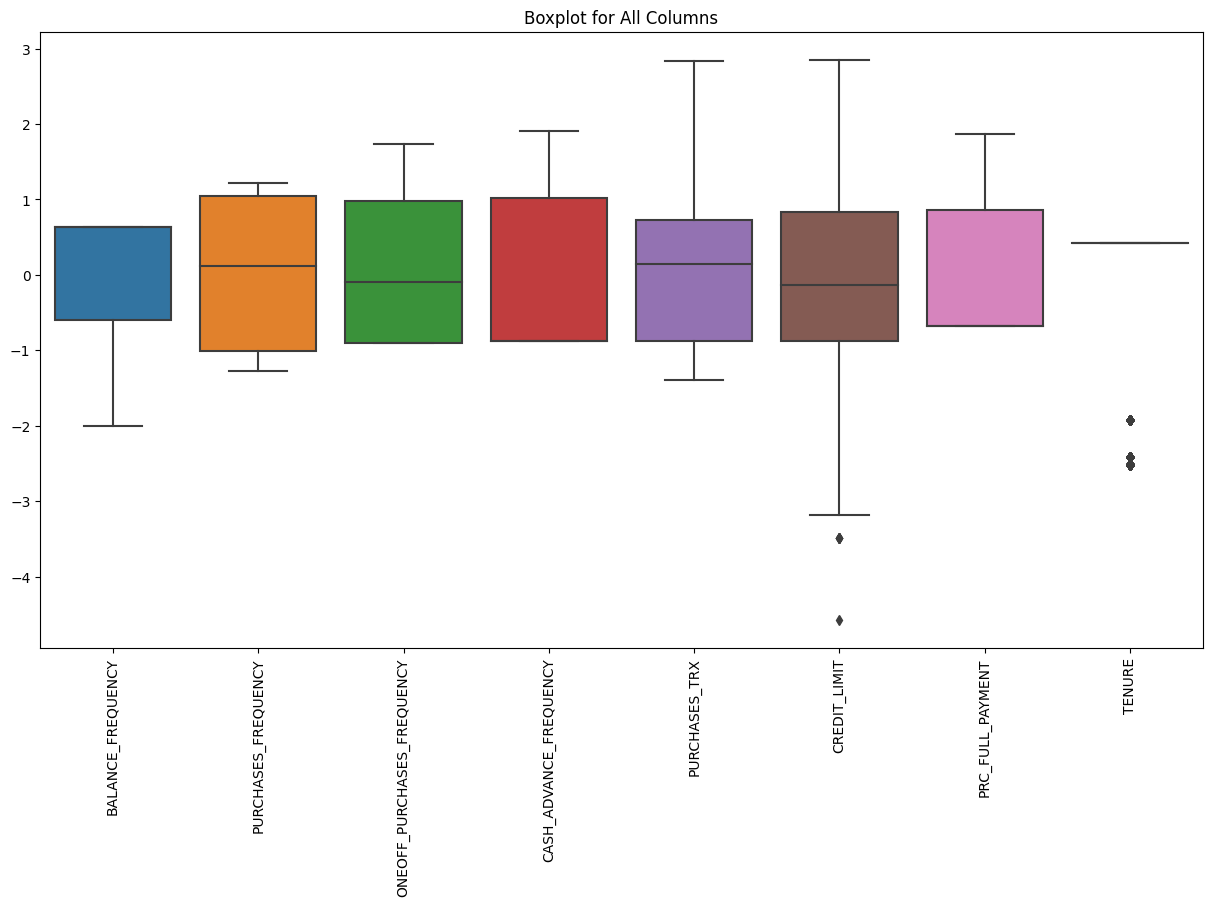

In [236]:
# Create a boxplot for all columns at once
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Boxplot for All Columns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [237]:
X = df

In [238]:
X = X.dropna()

In [239]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,max_iter=100)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,71583.253380
1,2,52948.023161
2,3,45192.557779
3,4,39042.817538
4,5,34614.463565
5,6,31754.177618
6,7,29444.395767
7,8,27344.927793
8,9,25823.781883


In [240]:
errors = clusters_df['cluster_errors']

In [241]:
for i in range(8):
    print(errors[i+1]-errors[i])

-18635.230219157907
-7755.465381162016
-6149.740241582105
-4428.353973039215
-2860.285947296783
-2309.7818503006456
-2099.467973825649
-1521.1459107931805


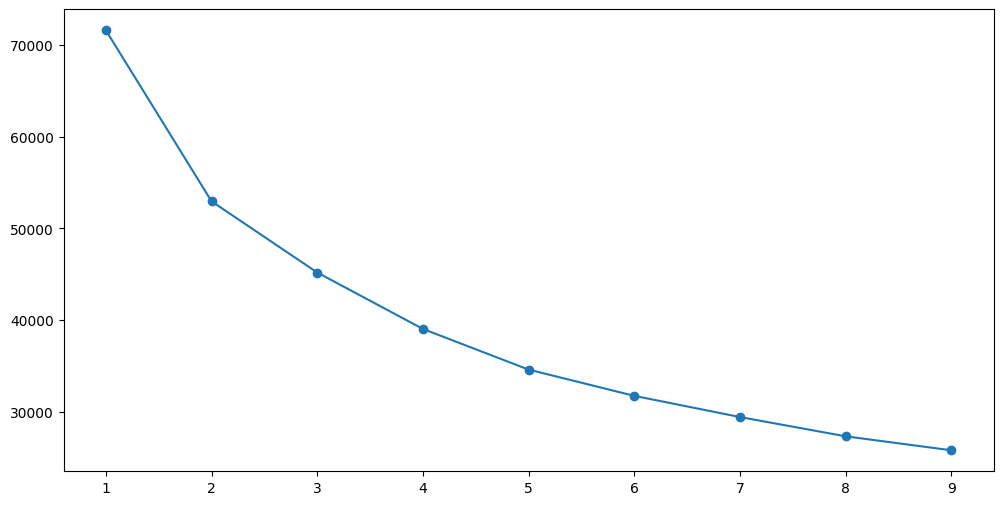

In [242]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [243]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-1.73105674 -0.37306381 -0.36741568 -0.54315836 -0.28416508 -0.09100926
   0.39639548  0.41597329]
 [ 0.49938639  0.91447232  1.32803857 -0.20551549  1.07551656  0.67948469
   0.17558267  0.35498602]
 [ 0.53244956  0.70770796 -0.43885971 -0.55411786  0.5191572  -0.48604645
   0.11391756  0.40756121]
 [-0.50672402 -0.27731121 -0.26492261  0.32285153 -0.44348854 -0.44924959
  -0.05932006 -2.36265905]
 [ 0.54365642 -1.07814184 -0.59069117  0.83354926 -1.05391507  0.02442971
  -0.50465298  0.41262319]]


In [244]:
prediction= kmeans.predict(X)
X_df = X
X_df["group"] = prediction

In [245]:
X_df.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,group
0,-1.079348,-0.766859,-0.903315,-0.883204,-0.573664,-1.425281,-0.677889,0.422252,0
1,-0.424939,-1.278866,-0.903315,1.124423,-1.387624,0.924151,1.235021,0.422252,4
2,0.628612,1.218860,1.732554,-0.883204,0.494757,1.012124,-0.677889,0.422252,1
3,-1.710851,-1.015926,-0.092230,0.136071,-0.872718,1.012124,-0.677889,0.422252,0
4,0.628612,-1.015926,-0.092230,-0.883204,-0.872718,-1.215649,-0.677889,0.422252,4


array([[<Axes: title={'center': 'BALANCE_FREQUENCY'}, xlabel='[group]'>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}, xlabel='[group]'>,
        <Axes: title={'center': 'CREDIT_LIMIT'}, xlabel='[group]'>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}, xlabel='[group]'>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}, xlabel='[group]'>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}, xlabel='[group]'>],
       [<Axes: title={'center': 'PURCHASES_TRX'}, xlabel='[group]'>,
        <Axes: title={'center': 'TENURE'}, xlabel='[group]'>, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

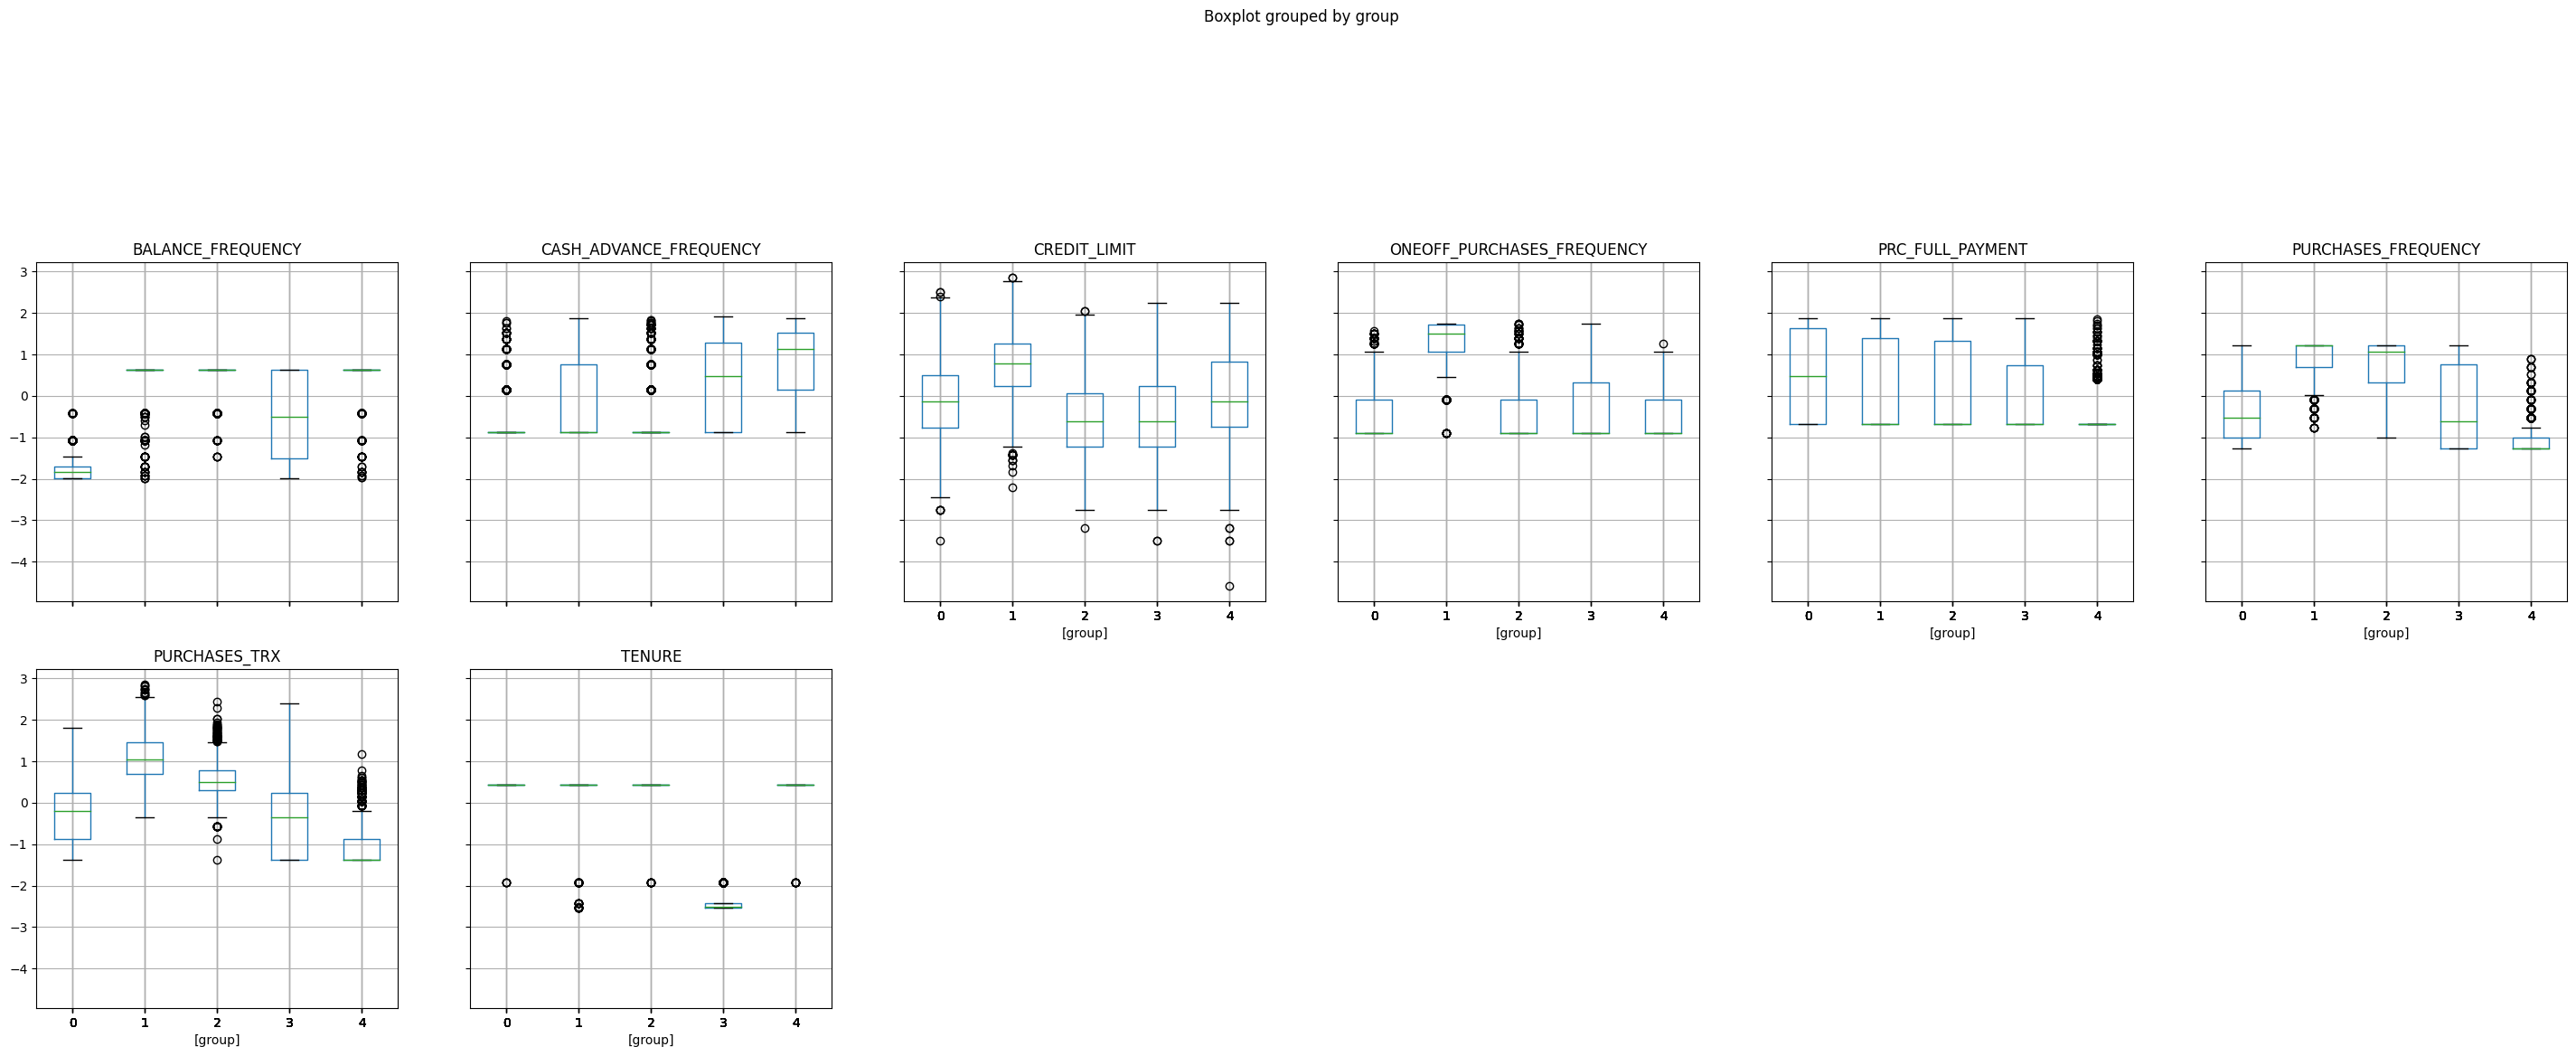

In [246]:
X_df.boxplot(by = 'group',  layout=(6,6), figsize=(35, 35))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.24688554062883


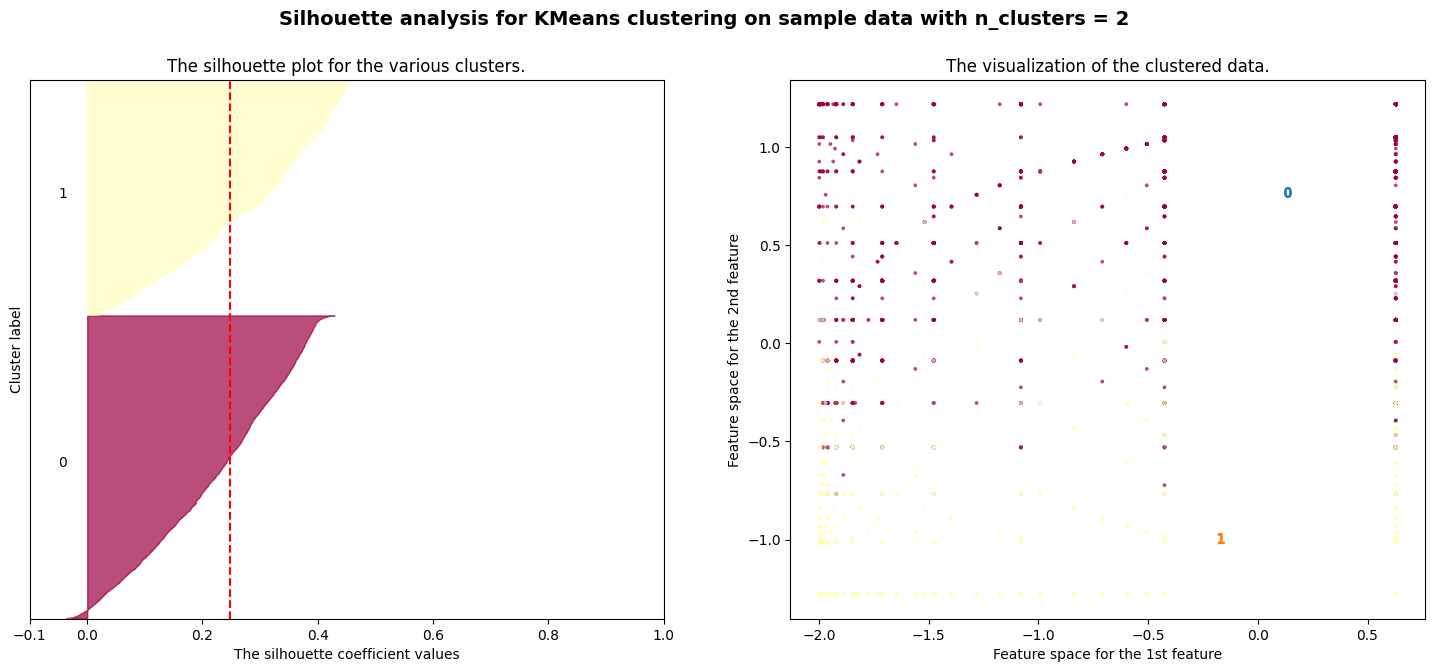

For n_clusters = 3 The average silhouette_score is : 0.2506579124791514


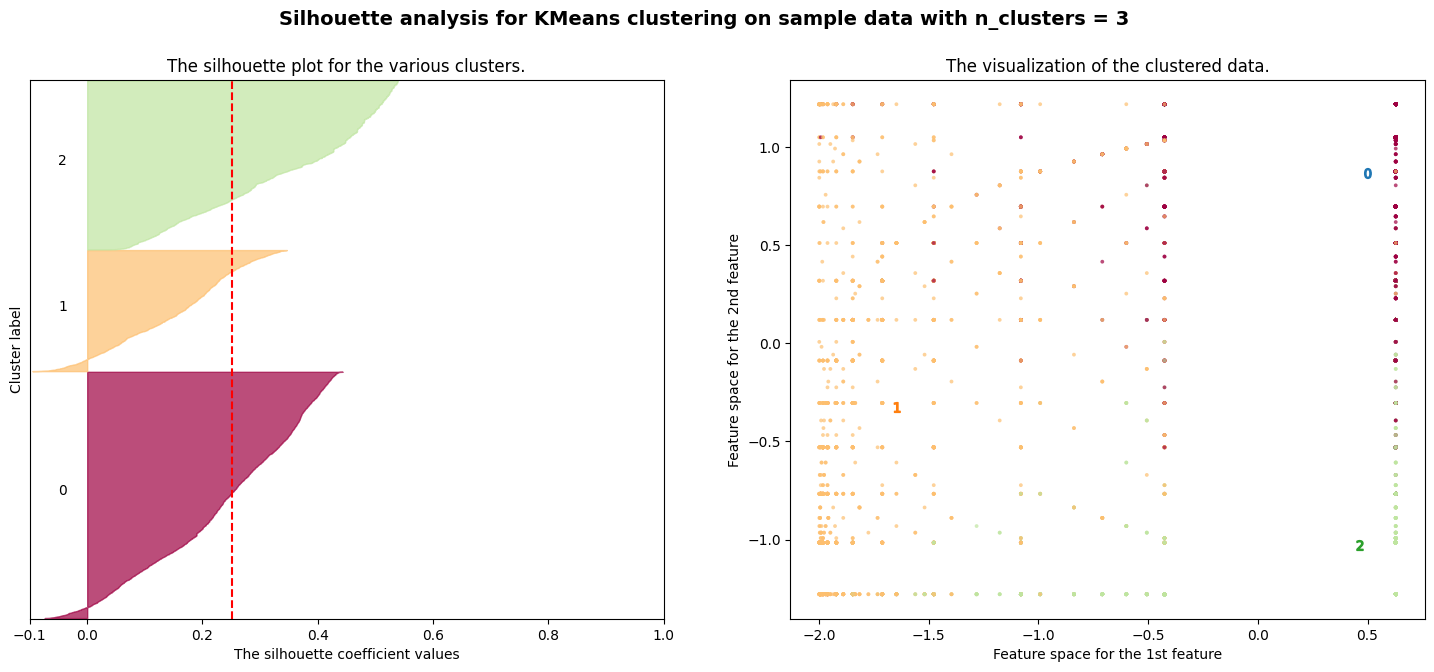

For n_clusters = 4 The average silhouette_score is : 0.2642484886480319


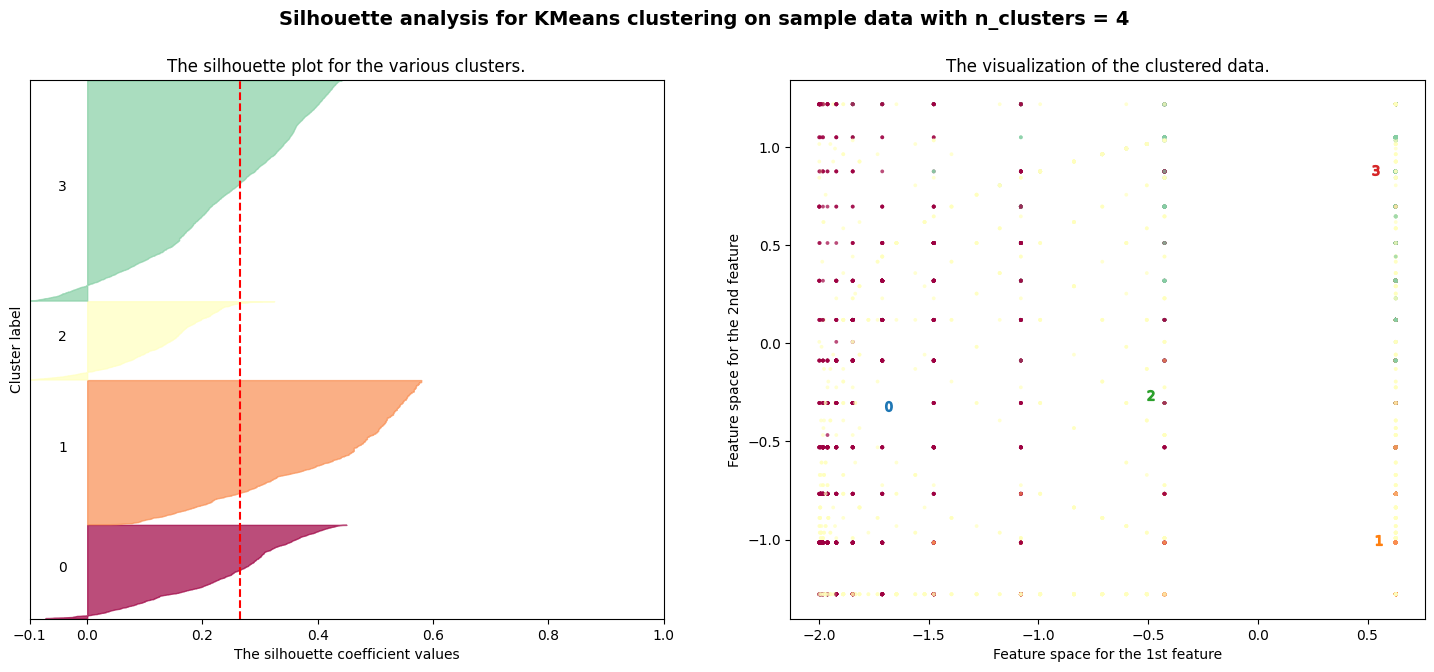

For n_clusters = 5 The average silhouette_score is : 0.24479096236055722


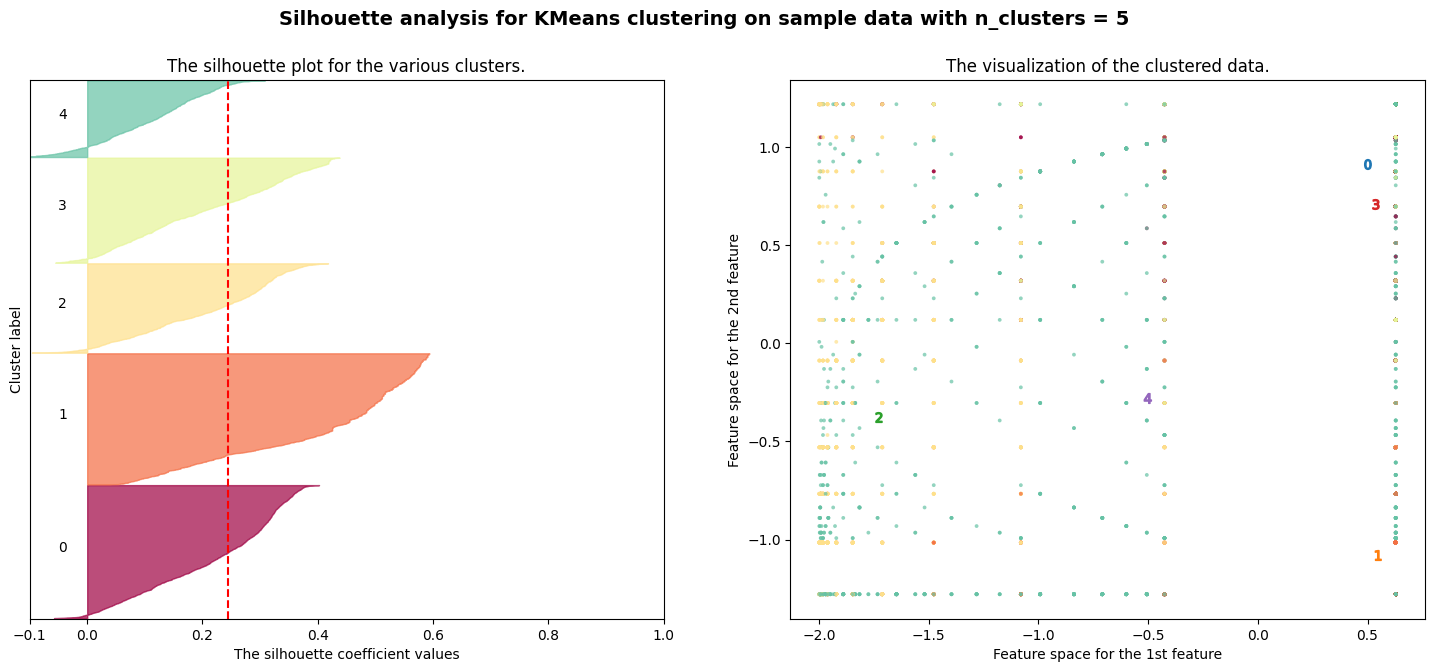

For n_clusters = 6 The average silhouette_score is : 0.24089922019530446


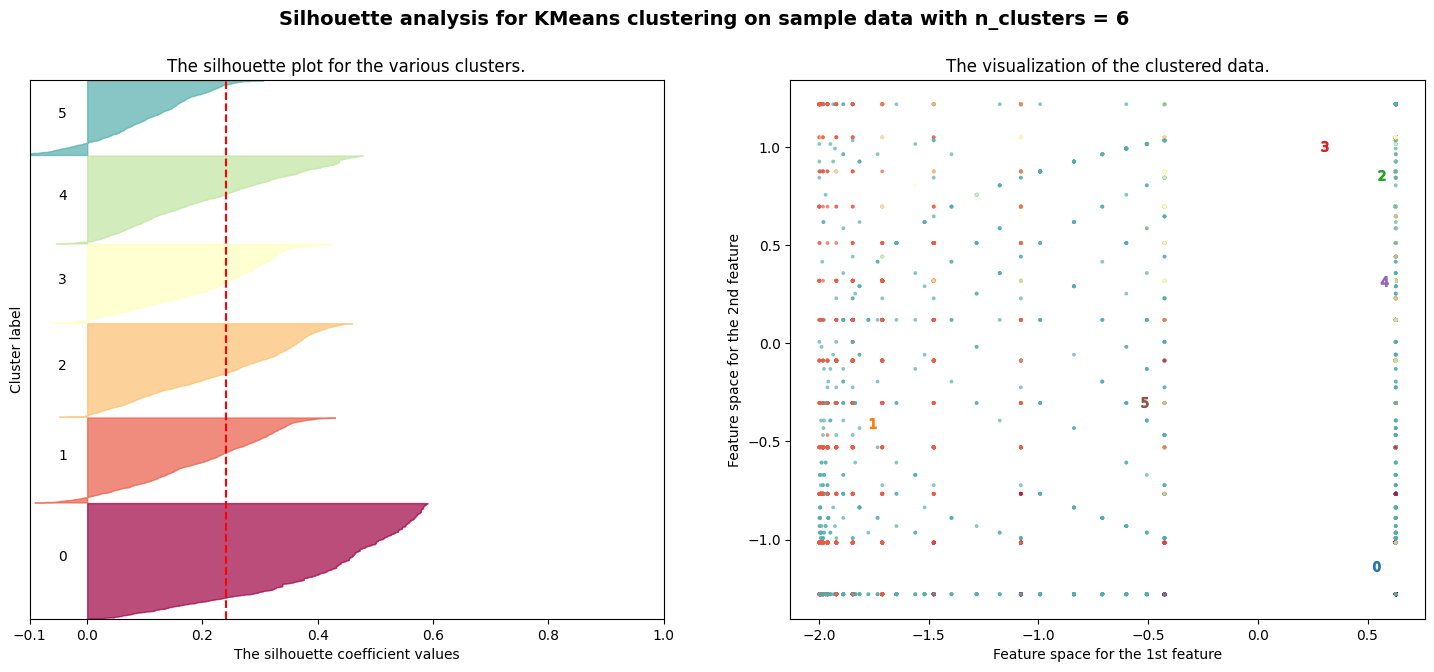

For n_clusters = 7 The average silhouette_score is : 0.2479243888843441


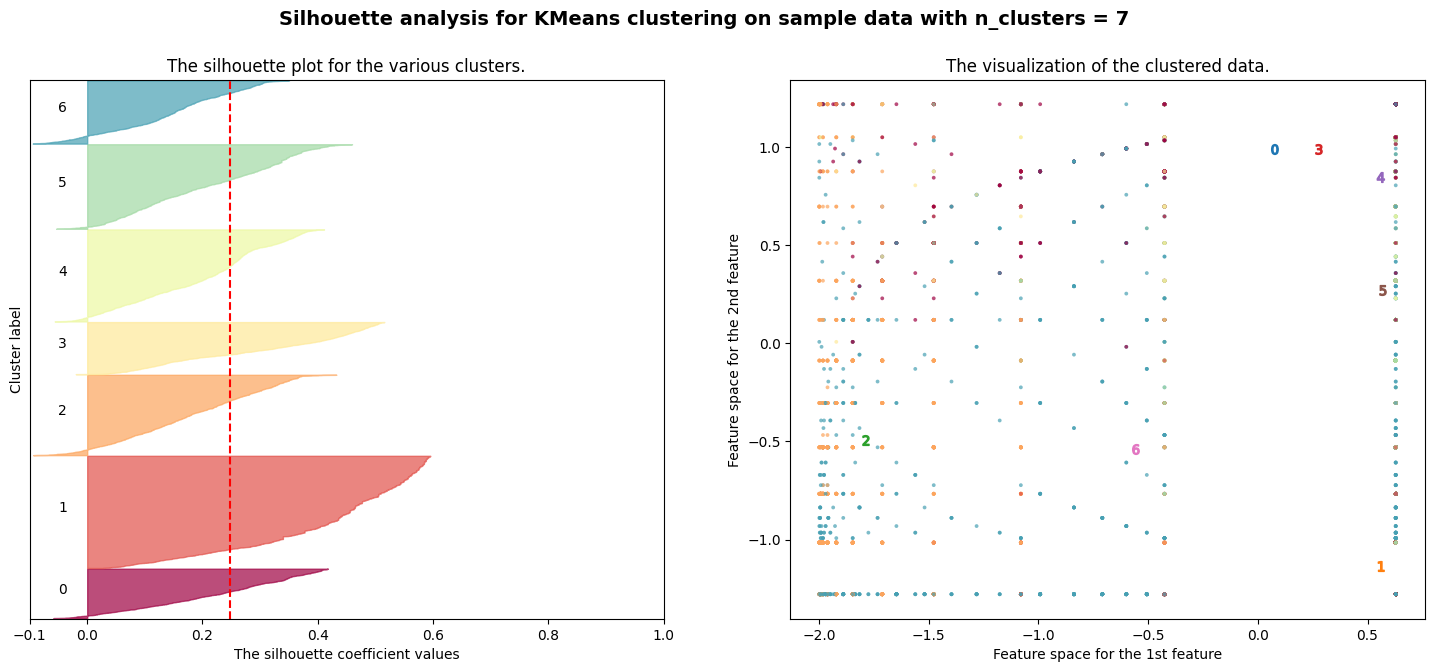

For n_clusters = 8 The average silhouette_score is : 0.250855966434221


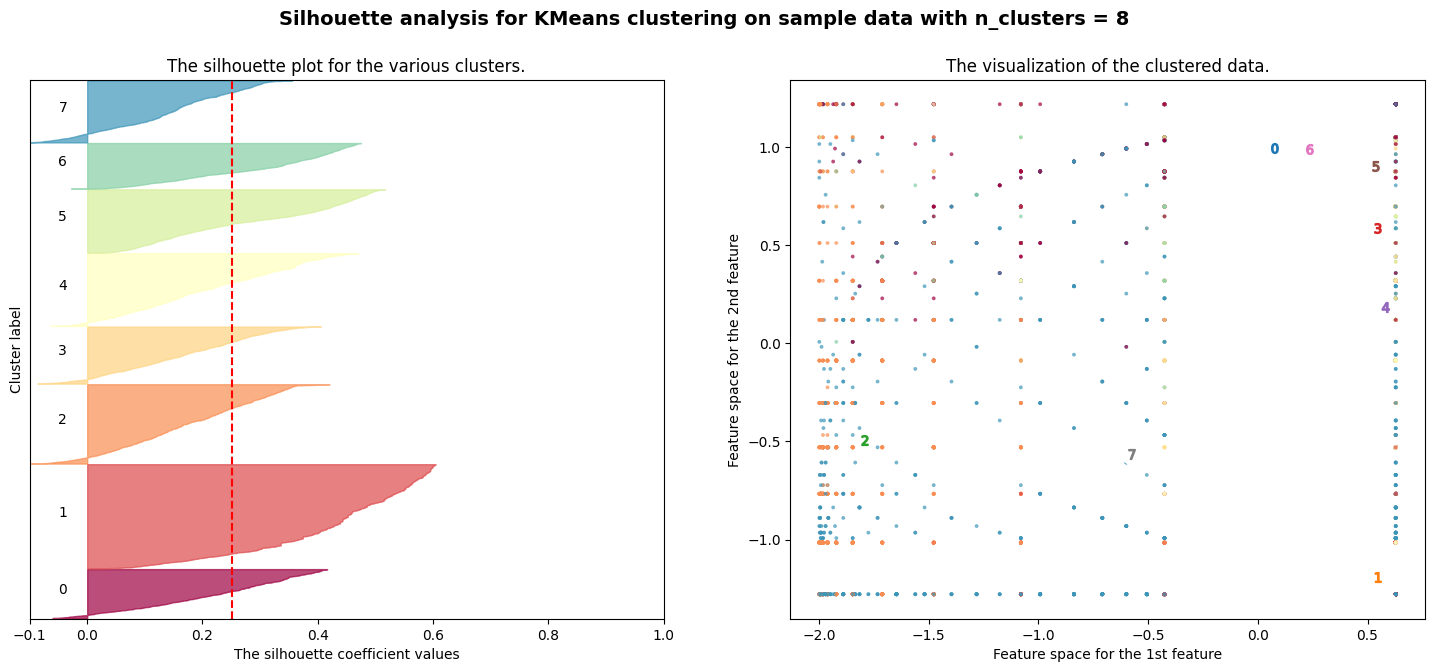

For n_clusters = 9 The average silhouette_score is : 0.26039763597057775


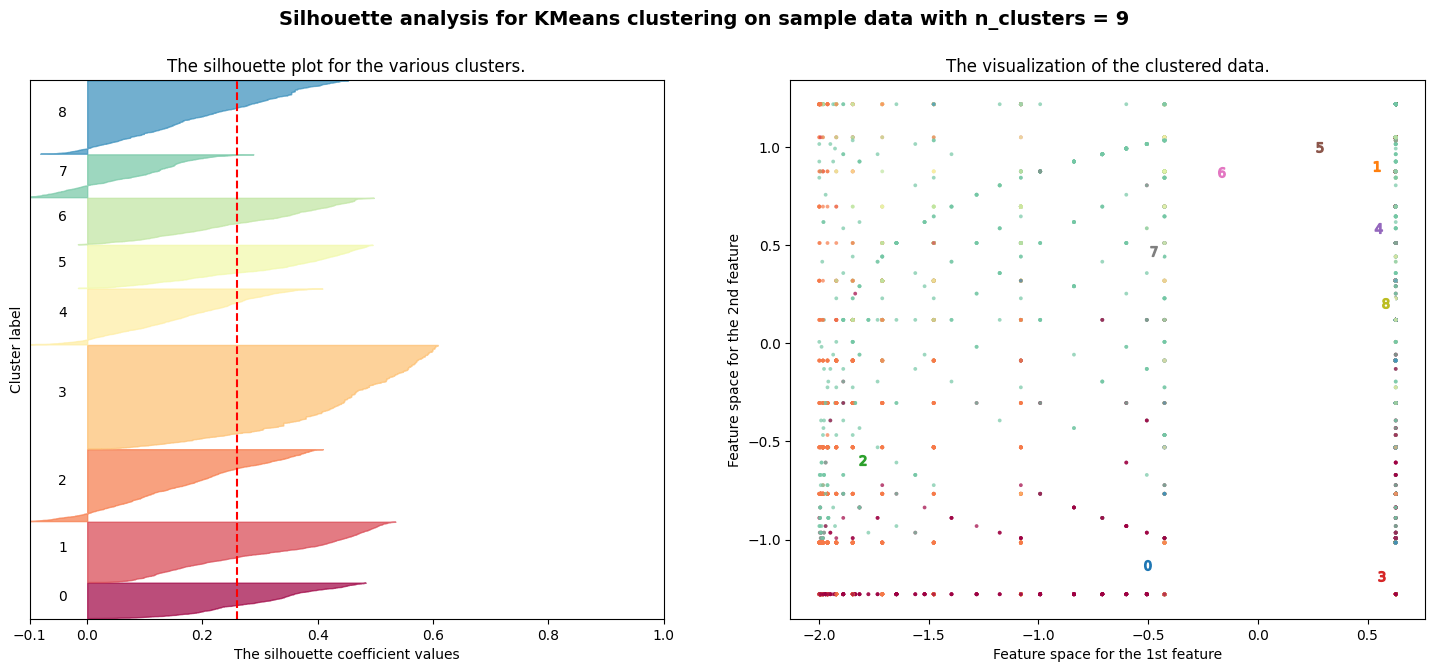

For n_clusters = 10 The average silhouette_score is : 0.2714656419493751


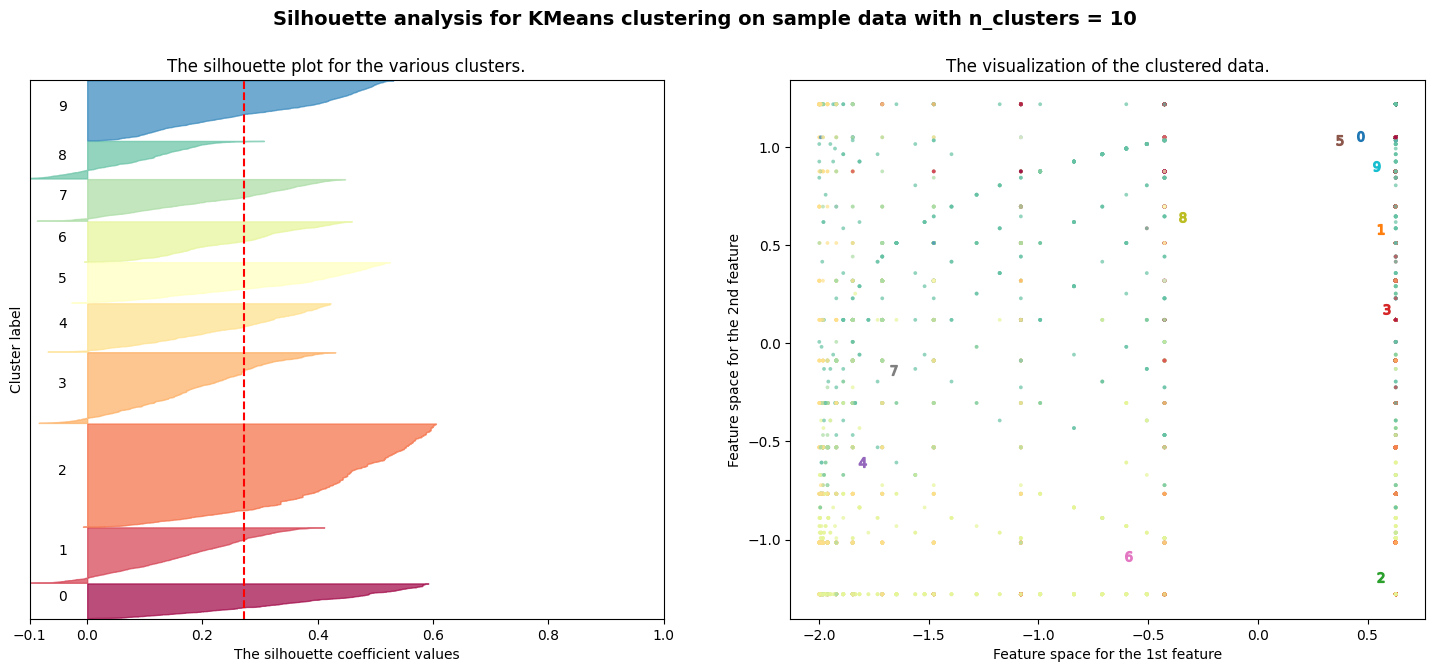

In [247]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [248]:
from sklearn.cluster import AgglomerativeClustering

In [249]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')

In [250]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

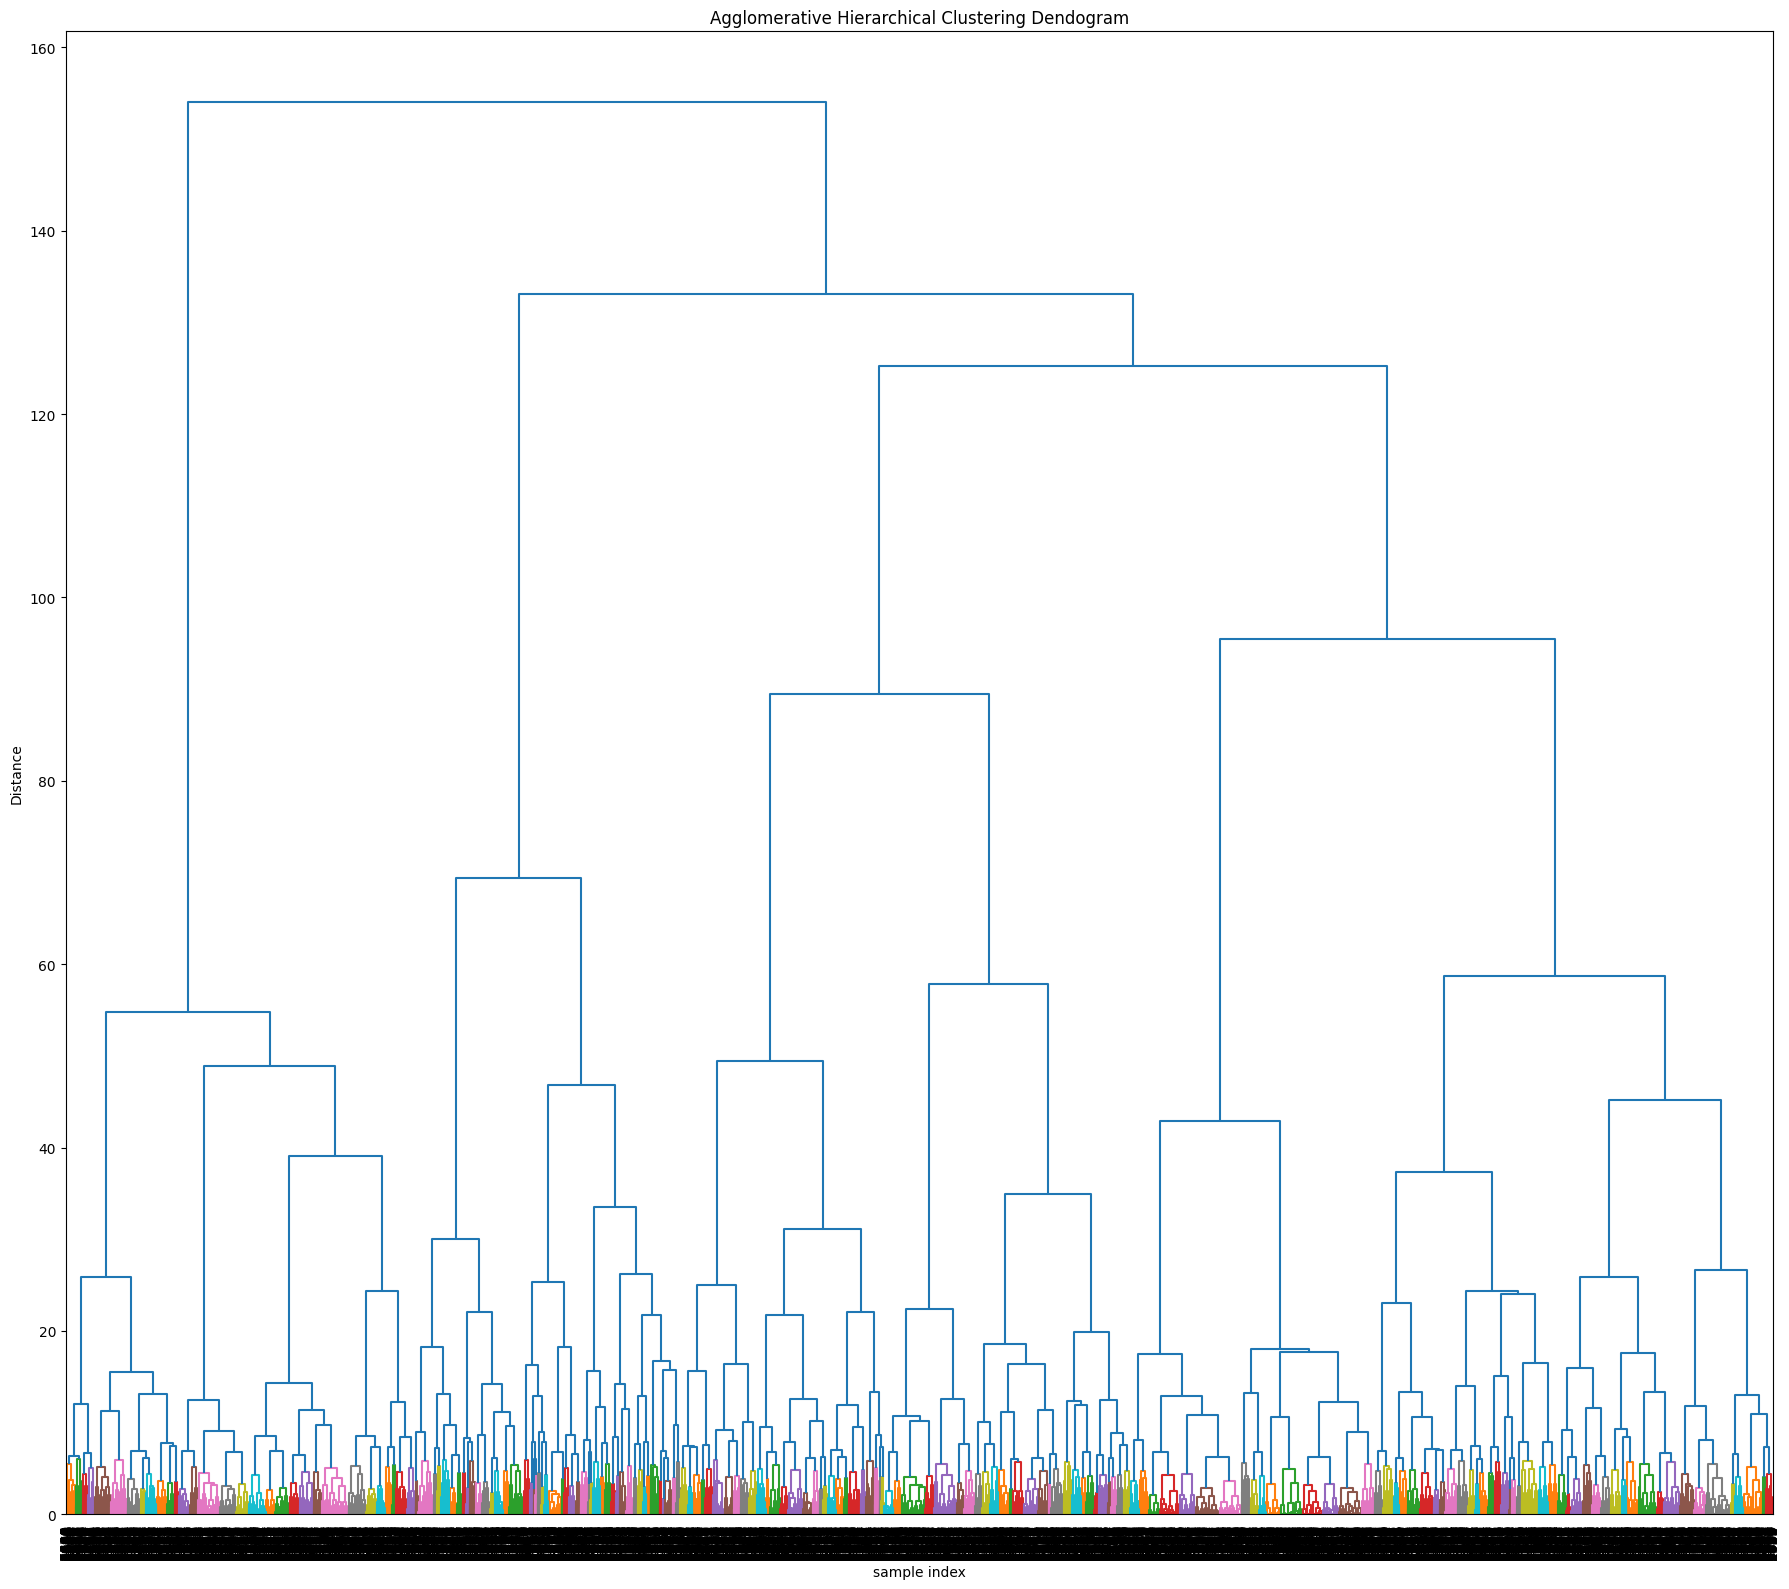

In [251]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=6,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=123)

In [261]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [262]:
model3.score(X_test, y_test)

0.9929236499068901